<a href="https://colab.research.google.com/github/canhtc/KTCNPM/blob/master/K61_SVM_XT_AC_Total_AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/driver')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/driver


In [2]:

import numpy as np
from sklearn.svm import SVR 
from sklearn import linear_model
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
from glob import glob

In [3]:
path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/*.csv'
path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/test_k59/dataH.csv'

# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/test/data_6.csv'

# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/test/data_10.csv'

In [4]:
files = glob(path_train)
x_input =[]
y_output=[]
print(files)
for file in files:
  data = pd.read_csv(file)
  data_xt = data['XT'].values
  data_ac = data['AC'].values/1000
  data_total_at = data['TOTAL_AC'].values/1000

#dung de lay du lieu theo cap
  data_input2D = []
  data_output1D = []
  steps = 3
  
  for i in range(0,len(data_xt)-steps+1):
    temp_3D = []
    for k in range(i, i+steps):
      temp_2D = []
      temp_2D.append(data_xt[k])
      temp_2D.append(data_ac[k])
      
      temp_3D.append(temp_2D)
      data_output1D.append(data_total_at[k])

    data_input2D.append(temp_3D)
  x_input.append(data_input2D)
  y_output.append(data_output1D)

x_input = np.concatenate( x_input, axis=0 )
y_output = np.concatenate( y_output, axis=0 )
x_train = np.asarray(x_input)
y_train = np.asarray(y_output)

x_train = x_train.reshape((len(x_train)*3,2))
y_train = y_train.reshape(-1,1)
y_train = np.ravel(y_train)

print(x_train.shape,y_train.shape)
print(x_train[:4],y_train[:4])

['/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataA.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataB.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataC.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataD.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataE.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataF.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataG.csv']
(273, 2) (273,)
[[0.13    0.04604]
 [0.17    0.06549]
 [0.24    0.07921]
 [0.17    0.06549]] [0.25969 0.25969 0.25969 0.25969]


In [5]:
test = pd.read_csv(path_test)
ip_test_xt = test['XT'].values.astype('float64') 
ip_test_ac = test['AC'].values.astype('float64')/1000
test_output = test['TOTAL_AC'].values.astype('float64')

x_input=[]
y_output =[]

data_input2D = []
data_output1D = []
steps = 3

for i in range(0,len(ip_test_xt)-steps+1):
  temp_3D = []
  for k in range(i, i+steps):
    temp_2D = []
    temp_2D.append(ip_test_xt[k])
    temp_2D.append(ip_test_ac[k])
    
    temp_3D.append(temp_2D)
    data_output1D.append(test_output[k])

  data_input2D.append(temp_3D)
x_input.append(data_input2D)
y_output.append(data_output1D)

x_input = np.concatenate( x_input, axis=0)
y_output = np.concatenate( y_output, axis=0)

x_test = np.asarray(x_input)
y_test = np.asarray(y_output)

x_test = x_input.reshape((len(x_input)*3,2))
y_test = y_test.reshape(-1,1)
y_test = np.ravel(y_test)

print(x_test.shape,y_test.shape)
print(x_test, y_test)

(48, 2) (48,)
[[0.16    0.17369]
 [0.21    0.21994]
 [0.26    0.26936]
 [0.21    0.21994]
 [0.26    0.26936]
 [0.3     0.32039]
 [0.26    0.26936]
 [0.3     0.32039]
 [0.36    0.36985]
 [0.3     0.32039]
 [0.36    0.36985]
 [0.42    0.41468]
 [0.36    0.36985]
 [0.42    0.41468]
 [0.47    0.48741]
 [0.42    0.41468]
 [0.47    0.48741]
 [0.54    0.55553]
 [0.47    0.48741]
 [0.54    0.55553]
 [0.61    0.62454]
 [0.54    0.55553]
 [0.61    0.62454]
 [0.68    0.69023]
 [0.61    0.62454]
 [0.68    0.69023]
 [0.74    0.75142]
 [0.68    0.69023]
 [0.74    0.75142]
 [0.8     0.81065]
 [0.74    0.75142]
 [0.8     0.81065]
 [0.85    0.85768]
 [0.8     0.81065]
 [0.85    0.85768]
 [0.89    0.89862]
 [0.85    0.85768]
 [0.89    0.89862]
 [0.92    0.93329]
 [0.89    0.89862]
 [0.92    0.93329]
 [0.95    0.95485]
 [0.92    0.93329]
 [0.95    0.95485]
 [0.98    0.96817]
 [0.95    0.95485]
 [0.98    0.96817]
 [1.      0.98992]] [989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92
 9

In [6]:
C_2d_range = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5]
gamma_2d_range = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]
classifiers = []

for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVR(kernel='rbf', C=C, gamma=gamma)
        clf.fit(x_train, y_train)
        classifiers.append((C, gamma, clf))
max_acc = 0
best_C = 0
best_gamma = 0

for (k, (C, gamma, clf)) in enumerate(classifiers):
  print(C, gamma,clf.predict(x_test)*1000)
  # print(C, gamma)
  result = clf.predict(x_test)*1000
  acc = 0
  for i in range(y_test.size):
    acc += (1- abs(y_test[i]-result[i])/y_test[i])*100
  print(acc / y_test.size)
  if(max_acc!=max(max_acc,acc / y_test.size)):
    max_acc = max(max_acc,acc / y_test.size)
    best_C = C
    best_gamma = gamma

print("MAX acc:", max_acc, ", BEST C: ",best_C, ", BEST_gamma: ", best_gamma)


1e-05 1e-10 [449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38
 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38
 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38
 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38
 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38]
45.39558752222492
1e-05 1e-09 [449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38
 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38
 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38
 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38
 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38]
45.395587522233086
1e-05 1e-08 [449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38
 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38
 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38 449.38
 449.38 449.38 449.38 449.38 4

actually:  [989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92
 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92
 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92
 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92
 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92]
model:  [824.04394528 862.88140102 901.35268838 862.88140102 901.35268838
 952.94716376 901.35268838 952.94716376 953.93592803 952.94716376
 953.93592803 940.78461787 953.93592803 940.78461787 987.36169115
 940.78461787 987.36169115 982.76420314 987.36169115 982.76420314
 974.12010163 982.76420314 974.12010163 960.28724869 974.12010163
 960.28724869 954.62277894 960.28724869 954.62277894 950.43943741
 954.62277894 950.43943741 949.38659316 950.43943741 949.38659316
 954.67854759 949.38659316 954.67854759 964.00768732 954.67854759
 964.00768732 966.18059929 964.00768732 966.18059929 964.86119258
 966.18059929 964.86119258 974.87979747]


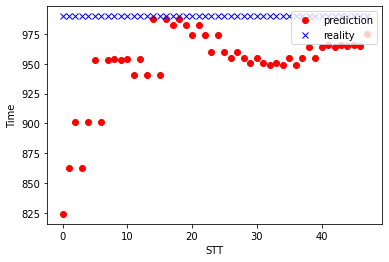

pecent:  [83.2434888960089, 87.16678125718663, 91.05308392376843, 87.16678125718663, 91.05308392376843, 96.26506826454303, 91.05308392376843, 96.26506826454303, 96.36495151456735, 96.26506826454303, 96.36495151456735, 95.03642899123395, 96.36495151456735, 95.03642899123395, 99.7415640813507, 95.03642899123395, 99.7415640813507, 99.27713382310252, 99.7415640813507, 99.27713382310252, 98.40392169343608, 99.27713382310252, 98.40392169343608, 97.00655090245144, 98.40392169343608, 97.00655090245144, 96.43433600112078, 97.00655090245144, 96.43433600112078, 96.0117421014937, 96.43433600112078, 96.0117421014937, 95.90538560325172, 96.0117421014937, 95.90538560325172, 96.43996965284559, 95.90538560325172, 96.43996965284559, 97.38238315397959, 96.43996965284559, 97.38238315397959, 97.60188694987099, 97.38238315397959, 97.60188694987099, 97.46860277410396, 97.60188694987099, 97.46860277410396, 98.48066484817178]
accuracy:  96.03683628703772


In [7]:
model = SVR(kernel='rbf', C=best_C, gamma=best_gamma)

model.fit(x_train, y_train)

result = model.predict(x_test)*1000
test_output = y_test
plt.plot(result,'o', color='r')
plt.plot(test_output,'x', color='b')
plt.xlabel("STT")
plt.ylabel("Time")
print("actually: ",test_output.reshape(test_output.size))
print("model: ", result)


plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

percent = []
acc = 0

for i in range(y_test.size):
  p = (1- abs(y_test[i]-result[i])/y_test[i])*100
  percent.append(p)
  acc += p
print("pecent: ", percent)
print("accuracy: ", acc/(result.size))